# Análise do vestibular ENEM 2019

## Introduction to Data Science

## The CRISP-DM approach to Data Science Tasks

_________________________

## I. Business Understanding
                    
#### The Business Understanding phase focuses on understanding the objectives and requirements of the project.  
+ Determine business objectives:   
+ Assess situation:  
+ Determine data mining goals:  
+ Produce project plan:  



#### Determine business objectives:   

* Compreender quais aspectos melhor determinam a nota de um aluno no Enem de acordo com a Teoria de Resposta ao Item.

- Observar se existe uma correlação entre as notas de cada uma das 4 áreas do conhecimento e a redação. 

* Entender como é distribuida a educação no país, e quais fatores interferem no desempenho de um estudante.

- Analisar se com as cotas há um acesso mais democrático às instituições públicas de ensino.

#### Assess situation:  

* Sabemos que o ENEM utiliza o TRI (Teoria de Resposta ao Item) que classifica as questões conforme a dificuldade, isto é, cada questão possui um peso pré-determinado que não conhecido do público. Esse sistema é utilizado para evitar "chutes", se um aluno erra uma questão considerada fácil e acerta uma questão considerada difícil, o aluno sofre uma penalidade. Desse modo, mesmo com o gabarito dos alunos não nos é possível determinar a nota correta dos alunos, pretendemos obter o melhor modelo de regrassão para atribuir a nota aos alunos.

- A priori, acreditamos que no Brasil, as escolas privadas e escolas públicas federais obtém um melhor desempenho no ENEM, do que os alunos de escolas públicas estaduais e municipais. Além disso, acreditamos que a locaclização geográfica da escola e da moradia do estudante e a renda familiar influencia no seu desempenho, alunos que moram em situações vuneráveis e|ou possuem baixa renda tendem a obter um desempenho inferior a média nacional. 

#### Determine data mining goals:  

- Obter os dados oficiais do INEP de todos os alunos que fizeram o vestibular no ano de 2019: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem onde consta os microdados do ENEM ("Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem" - INEP).

* Obter as notas de corte de algumas universidades públicas brasileiras para analizar a democratização do ensino público.

#### Produce project plan: 

- Limpar os dados, por exemplo, remover os alunos treineiros e alunos que não concluiram o vestibular da base de dados.

* Analisar os nossos dados, obter as médias, os mínimos e os máximos.

- Criar classificadores, se necessário. 

* Determinar as informações que serão utilizadas em cada modelo.

- Observar se existe alguma correlação dentre as informações disponíveis. 

* Encontrar o melhor modelo de regressão para as notas.

- Analisar a questão das cotas e da nota de corte das universidades públicas.

* Reunir as informações obtidas e concluir o trabalho.


## II. Data Understanding  

+ Collect initial data:  
+ Describe data:  
+ Explore data:  
+ Verify data quality:  

Os dados oficiais do vestibular foram obtidos através de https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem nele vamos utilizar o arquivo MICRODADDOS_ENEM_2019.csv com os dados brutos de todos os alunos que realizaram o ENEM. Já o arquivo Dicionário_Microdados_Enem_2019.xlsx descreve esses dados.

In [2]:
# Importando Bibliotecas 


import numpy as np
import pandas as pd
import seaborn as sns
import dask
import json
import dask.dataframe as dd
import matplotlib.pyplot as plt


# Importando os Dados

dic = pd.read_excel('Dicionário_Microdados_Enem_2019.xlsx' )

#df = pd.read_csv("MICRODADOS_ENEM_2019.csv",sep=";",encoding = "ISO-8859-1",decimal=",")
#df.head()

df = dd.read_csv("MICRODADOS_ENEM_2019.csv",sep=";",encoding = "ISO-8859-1",dtype={'NU_IDADE': 'float64'})

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


### Observações gerais:

* Há 3 tipos de vestibulandos que realizaram o ENEM, os estudantes que ainda não terminaram o Ensino MÉdio, os alunos que concluiram o Ensino Médio no ano de 2019, e os alunos que concluiram o ENEM anteriormente
    - Segundo informações do INEP, as notas dos alunos em cada uma das provas segue uma distribuição normal com média 500 e desvião padrão 100 dos alunos que terminaram o vestibular no ano de 2019.
* As primeiras colunas referem-se aos dados pessoais do vestibulando:
    - Município de Residência;
    - Idade;
    - Sexo (M para masculino e F para feminino);
    - Estado Civil;
    - Raça; 
    - Nacionadlidade e cidade de nascença. 
* Em seguida há colunas referentes a escolaridade básica:
    - Se concluiu ou não o Ensino Médio;
    - Se sim em qual escola;
    - O ano que ele concluiu;
    - Informações da localização da escola;
    - Informações do tipo de escola.
* As próximas colunas se referem a necessidade de um atendimento especial por causa de alguma deficiência.
    - Não iremos entrar muito em detalhes pois nesse trabalho vamos focar nos estudadntes que não possuem problemas físicos.
* Depois, seguem as colunas com informações do local de aplicação do vestibular.
* Nas colunas posteriores os dados são relacionados à prova:
    - A presença dos alunos em cada umas das provas;
    - As repostas dos candidatos as questões objetivas;
    - Notas de cada uma das avaliações;
    - Gabarito oficial da prova que o aluno concluiu;
    - Nota da Redação e de cada uma das 5 competências.
* Por fim temos o questionário socioeconômico:
    - Perguntas aos candidatos sobre a sua família;
    - Perguntas sobre a renda familiar;
    - Perguntas sobre a moradia.

In [2]:
df.describe(include='all')


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,object,float64,object,float64,object,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,float64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [3]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: object(41), float64(25), int64(70)

Analizando os dados faltates do dataframe:

In [4]:
nans = df.isnull().sum()

i = 0

for j in nans:
    print(df.columns[i],j)
    i = i+1

NU_INSCRICAO 0
NU_ANO 0
CO_MUNICIPIO_RESIDENCIA 0
NO_MUNICIPIO_RESIDENCIA 0
CO_UF_RESIDENCIA 0
SG_UF_RESIDENCIA 0
NU_IDADE 69
TP_SEXO 0
TP_ESTADO_CIVIL 0
TP_COR_RACA 0
TP_NACIONALIDADE 0
CO_MUNICIPIO_NASCIMENTO 145249
NO_MUNICIPIO_NASCIMENTO 145249
CO_UF_NASCIMENTO 145249
SG_UF_NASCIMENTO 145249
TP_ST_CONCLUSAO 0
TP_ANO_CONCLUIU 0
TP_ESCOLA 0
TP_ENSINO 2217073
IN_TREINEIRO 0
CO_ESCOLA 3947858
CO_MUNICIPIO_ESC 3947858
NO_MUNICIPIO_ESC 3947858
CO_UF_ESC 3947858
SG_UF_ESC 3947858
TP_DEPENDENCIA_ADM_ESC 3947858
TP_LOCALIZACAO_ESC 3947858
TP_SIT_FUNC_ESC 3947858
IN_BAIXA_VISAO 0
IN_CEGUEIRA 0
IN_SURDEZ 0
IN_DEFICIENCIA_AUDITIVA 0
IN_SURDO_CEGUEIRA 0
IN_DEFICIENCIA_FISICA 0
IN_DEFICIENCIA_MENTAL 0
IN_DEFICIT_ATENCAO 0
IN_DISLEXIA 0
IN_DISCALCULIA 0
IN_AUTISMO 0
IN_VISAO_MONOCULAR 0
IN_OUTRA_DEF 0
IN_GESTANTE 0
IN_LACTANTE 0
IN_IDOSO 0
IN_ESTUDA_CLASSE_HOSPITALAR 0
IN_SEM_RECURSO 0
IN_BRAILLE 0
IN_AMPLIADA_24 0
IN_AMPLIADA_18 0
IN_LEDOR 0
IN_ACESSO 0
IN_TRANSCRICAO 0
IN_LIBRAS 0
IN_TEMPO_ADIC

Observamos que as notas faltantes correnspondem aos alunos que faltaram no dia do vestibular ou tiveram sua prova anulada:

In [5]:
present = [
    df.groupby('TP_PRESENCA_CN').NU_NOTA_CN.sum().compute(),
    df.groupby('TP_PRESENCA_CH').NU_NOTA_CH.sum().compute(),
    df.groupby('TP_PRESENCA_LC').NU_NOTA_LC.sum().compute(),
    df.groupby('TP_PRESENCA_MT').NU_NOTA_MT.sum().compute(),]
    
print(present)


[TP_PRESENCA_CN
0    0.000000e+00
1    1.772934e+09
2    0.000000e+00
Name: NU_NOTA_CN, dtype: float64, TP_PRESENCA_CH
0    0.000000e+00
1    1.990010e+09
2    0.000000e+00
Name: NU_NOTA_CH, dtype: float64, TP_PRESENCA_LC
0    0.000000e+00
1    2.042066e+09
2    0.000000e+00
Name: NU_NOTA_LC, dtype: float64, TP_PRESENCA_MT
0    0.000000e+00
1    1.941017e+09
2    0.000000e+00
Name: NU_NOTA_MT, dtype: float64]


 Há tabém alguns dados faltantes relacionados a esocola de conclusão do Ensino Médio. É óbivio que os alunos treneiros não concluiram o ensino básico não possuem essas informações. 
 
 * Veremos se há uma corelação entre os tipos de vestibulandos, segundo o dicionário dos microdados do ENEM temos os seguintes tipos na coluna TP_ST_CONCLUSAO (Situação de conclusão do Ensino Médio):
    - 1: Já concluiu o EM, 
    - 2: Concluiu o EM em 2019, 
    - 3: Vai concluir o EM após 2019 (treneiros), 
    - 4: não concluiu e não está cursnado o EM (treneiros).

In [6]:
df.groupby('TP_ST_CONCLUSAO').CO_ESCOLA.mean().compute()

TP_ST_CONCLUSAO
1             NaN
2    3.126575e+07
3             NaN
4             NaN
Name: CO_ESCOLA, dtype: float64

De fato, apenas que concliu o Ensio Médio no ano do vestibular respondeu o questionário sobre a escola. Agora vou realizar uma análise relacionado ao tipo de escola para saber se há também perda de dados entre as escolas públicas e privadas. 
* Segundo os Microdados do ENEM a coluna TP_ESCOLA representa:
    - 1:	Não Respondeu	
    - 2:	Pública	
    - 3:	Privada	
    - 4:	Exterior	


### Análise corelacional dos dados.

In [3]:
#Correlação entre as notas.


ENEM = df.iloc[:,91:111].compute()
ENEM = ENEM.drop(["TP_STATUS_REDACAO"],axis=1)

f, ax = plt.subplots(figsize=(10, 8))
corr = ENEM.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

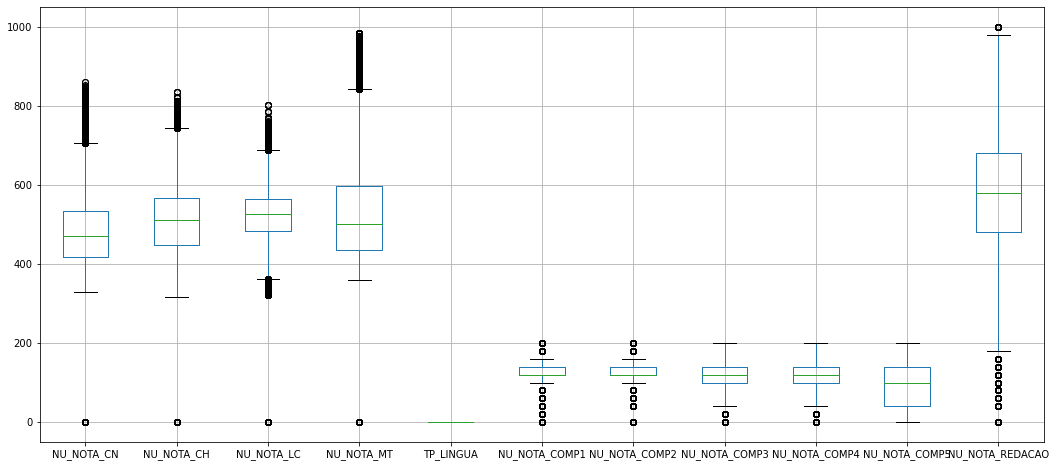

In [7]:
ENEM.boxplot(fontsize=10,figsize=(19, 6))

In [9]:
ENEM.drop(["TP_LINGUA"],axis=1).plot.density(fontsize=10,figsize=(19, 6))


KeyboardInterrupt: 

* Os tipo de escola.
    - 1: Federal
    - 2: Estadual
    - 3: Municipal
    - 4: Privada


In [8]:
school = [
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_REDACAO.mean().compute()]
    
print(school)

[TP_DEPENDENCIA_ADM_ESC
1.0    532.028308
2.0    455.013115
3.0    478.989470
4.0    544.780595
Name: NU_NOTA_CN, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    559.486424
2.0    485.943224
3.0    509.130196
4.0    571.588744
Name: NU_NOTA_CH, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    559.152574
2.0    503.874176
3.0    522.910669
4.0    567.969100
Name: NU_NOTA_LC, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    605.685105
2.0    497.209439
3.0    526.443656
4.0    627.826030
Name: NU_NOTA_MT, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    698.709528
2.0    535.227923
3.0    565.457398
4.0    729.439139
Name: NU_NOTA_REDACAO, dtype: float64]


As escolas particulares obteram melhores médias do que os alunos de escolas públicas.

A próxima análise será das notas em relação a região.


In [9]:
states = [
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_CN.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_CH.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_LC.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_MT.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_REDACAO.mean().compute()]
    
print(states)

[SG_UF_RESIDENCIA
AC    451.290462
AL    458.547809
AM    450.881956
AP    450.267287
BA    464.749375
CE    468.256969
DF    492.786286
ES    488.971497
GO    478.258151
MA    450.882586
MG    492.333365
MS    474.637703
MT    467.056028
PA    457.205827
PB    467.781141
PE    470.560241
PI    459.247826
PR    492.350597
RJ    491.892385
RN    475.584920
RO    459.223026
RR    467.313946
RS    486.504692
SC    493.055076
SE    468.779865
SP    496.996064
TO    458.528458
Name: NU_NOTA_CN, dtype: float64, SG_UF_RESIDENCIA
AC    480.995246
AL    485.499958
AM    481.354141
AP    482.029298
BA    493.379388
CE    497.715044
DF    523.134671
ES    517.651302
GO    505.836761
MA    477.666612
MG    520.842738
MS    500.194397
MT    494.280161
PA    485.580461
PB    495.907691
PE    498.546074
PI    484.998358
PR    523.545363
RJ    523.361916
RN    502.947521
RO    487.215906
RR    494.990995
RS    523.481137
SC    525.569803
SE    496.007553
SP    527.785569
TO    481.542105
Name: NU_NOTA

A partir do questionário socio-econômico do ENEM anazlisei a média das notas para cada uma das respostas.

In [10]:
# O processamento feito a seguir foi salvo no arquivo social-questionnaire.json pois demorou para calcular

'''
i = 1
questionnaire = []

while i <10:
    questionnaire.append({[
    df.groupby('Q00'+str(i)).NU_NOTA_CN.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_CH.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_LC.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_MT.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_REDACAO.mean().compute().tolist()]})
    i = i+1
    print("ok",i)

while i < 26:
    questionnaire.append([
    df.groupby('Q0'+str(i)).NU_NOTA_CN.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_CH.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_LC.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_MT.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_REDACAO.mean().compute().tolist()])
    i = i+1
    print("ok",i)

with open('social-questionnaire.json', 'w') as f:
    json.dump(questionnaire, f)

'''

# Lendo os dados que foram pré-processados

with open('social-questionnaire.json') as f:
   questionnaire = json.load(f)

print(questionnaire[0])

[[442.2739791190132, 454.3748427156051, 465.1795835372827, 471.8865770034298, 488.2020397860436, 528.8154217311948, 543.570116097516, 459.78136516703927], [469.7548846658781, 483.9687483165623, 495.4131887496624, 502.1112610691676, 518.7754981418016, 557.278762205226, 570.4682015807325, 489.62588435374147], [485.0112393987948, 500.5247181443891, 511.5388449707332, 518.0072642022582, 531.6112838437356, 559.2797922966262, 567.9815954739461, 507.18218598153544], [466.05376345238045, 486.4077780546843, 505.34442662374227, 515.6984986513664, 538.8768382225314, 600.1926782778664, 624.0266050365607, 495.39633289258586], [486.6628729452756, 524.3027494808495, 549.8694482713377, 566.1103979460847, 597.3121530934098, 667.4245842655957, 694.9726335081402, 526.8423833819242]]


In [11]:
years = [
    df.groupby('NU_IDADE').NU_NOTA_CN.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_CH.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_LC.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_MT.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_REDACAO.mean().compute()]


print(years[0])


    

NU_IDADE
13.0    457.238235
14.0    471.227286
15.0    486.022631
16.0    489.559169
17.0    483.756992
           ...    
10.0    472.220000
84.0    591.700000
92.0    429.000000
86.0    417.300000
87.0           NaN
Name: NU_NOTA_CN, Length: 82, dtype: float64


In [12]:
etnia = [
    df.groupby('TP_COR_RACA').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_REDACAO.mean().compute()
]

print(etnia[0])

TP_COR_RACA
0    486.549615
1    499.297852
2    461.047849
3    464.964331
4    477.348286
5    444.131051
Name: NU_NOTA_CN, dtype: float64


In [13]:
sexo = [
    df.groupby('TP_SEXO').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_REDACAO.mean().compute()
]

print(sexo)

[TP_SEXO
F    469.982003
M    489.316898
Name: NU_NOTA_CN, dtype: float64, TP_SEXO
F    501.894048
M    515.133324
Name: NU_NOTA_CH, dtype: float64, TP_SEXO
F    519.763160
M    521.628654
Name: NU_NOTA_LC, dtype: float64, TP_SEXO
F    506.167126
M    547.975110
Name: NU_NOTA_MT, dtype: float64, TP_SEXO
F    577.159368
M    562.396035
Name: NU_NOTA_REDACAO, dtype: float64]


In [14]:
conclusion = [
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_REDACAO.mean().compute()
]


print(conclusion[0])

TP_ANO_CONCLUIU
0     476.278801
1     478.234603
2     478.552169
3     480.434024
4     479.530786
5     479.320432
6     478.914089
7     479.395495
8     480.820738
9     477.905774
10    479.956699
11    481.830718
12    479.320202
13    481.049908
Name: NU_NOTA_CN, dtype: float64


## III. Data Preparation

+ Select data:   
+ Clean data:   
+ Construct data/transform data/feature engineering:   
+ Integrate data:   
+ (Re) Format data:   

Neste dataframe é perceptível algumas informações desnecessárias, como por exemplo o ano que foi prestado o vestibular, literalmente todos as pessoas desta base de dados realizaram o ENEM no ano de 2019. 

<!-- Além disso, para o nosso modelo vamos remover as pessoas que precisaram de alguma assistência para realizar a prova, p -->

In [15]:
df = df.dropna(subset=["NU_NOTA_REDACAO", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT"])


df = df.drop(["NU_INSCRICAO",
    "NU_ANO",
    "NO_MUNICIPIO_RESIDENCIA",
    "SG_UF_RESIDENCIA",
    "TP_NACIONALIDADE",
    "CO_MUNICIPIO_NASCIMENTO",
    "NO_MUNICIPIO_NASCIMENTO",
    "CO_UF_NASCIMENTO",
    "SG_UF_NASCIMENTO",
    "TP_SIT_FUNC_ESC",
    "CO_MUNICIPIO_PROVA",
    "NO_MUNICIPIO_PROVA",
    "CO_UF_PROVA",
    "SG_UF_PROVA",
    "TP_PRESENCA_CN",
    "TP_PRESENCA_CH",
    "TP_PRESENCA_LC",
    "TP_PRESENCA_MT",
    "CO_PROVA_CN",
    "CO_PROVA_CH",
    "CO_PROVA_LC",
    "CO_PROVA_MT",
    ],
    axis=1)

print(df.head())

   CO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  NU_IDADE TP_SEXO  \
3                  1721000                17      25.0       F   
4                  3118601                31      22.0       F   
5                  5107602                51      37.0       M   
6                  2924009                29      22.0       F   
9                  3550308                35      17.0       M   

   TP_ESTADO_CIVIL  TP_COR_RACA  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
3                1            1                1                4          1   
4                1            1                1                4          1   
5                2            2                1               13          1   
6                1            3                1                5          1   
9                1            1                2                0          2   

   TP_ENSINO  ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
3        NaN  ...     A     A     A    C    

## IV. Modeling

+ Select modeling techniques: 
+ Generate test design: 
+ Build model: 
+ Assess model:  

## V. Evaluation                    

+ Evaluate results: 
+ Review process: 
+ Determine next steps: 

## VI. Deployment

+ Plan deployment: 
+ Plan monitoring and maintenance: 
+ Produce final report: 
+ Review project: 